In [ ]:
!pip install efficientnet==1.1.1 keras-applications==1.0.8

In [ ]:
import tensorflow as tf
import keras

In [ ]:
!pip install segmentation_models

In [4]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [5]:
import segmentation_models as sm
import numpy as np

Segmentation Models: using `tf.keras` framework.


In [6]:
#from keras_cv.models import DeepLabV3Plus
#print(DeepLabV3Plus.presets.keys())

In [7]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import imageio.v3 as iio
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.model_selection import train_test_split
#import tensorflow as tf
#import keras # Explicitly import Keras 3
#from keras_cv.models import DeepLabV3Plus

In [8]:
images_url="/kaggle/input/satalite/satalite data/data/images"
labels_url="/kaggle/input/satalite/satalite data/data/labels"

In [9]:
images_path=sorted(os.listdir(images_url),key=lambda x:int(x.split('.')[0]))
print(images_path[0:20])
print(len(images_path))

['0.tif', '1.tif', '2.tif', '3.tif', '4.tif', '5.tif', '6.tif', '7.tif', '8.tif', '9.tif', '10.tif', '11.tif', '12.tif', '13.tif', '14.tif', '15.tif', '16.tif', '17.tif', '18.tif', '19.tif']
306


In [10]:
labels_path=sorted(os.listdir(labels_url),key=lambda x:int(x.split('.')[0]))
print(labels_path[0:20])
print(len(labels_path))

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png']
456


In [11]:
corrected_labels_path=[x for x in labels_path if x.find('_')==-1]

In [12]:
len(corrected_labels_path)

306

In [13]:
print(os.listdir(labels_url)[0:20])
print(len(os.listdir(labels_url)))

['38_68.png', '121_142.png', '173.png', '248.png', '94.png', '40_277.png', '18_42.png', '236.png', '85_117.png', '48.png', '23_251.png', '227.png', '97_130.png', '238.png', '61.png', '222.png', '108_236.png', '278.png', '62_187.png', '303.png']
456


In [14]:
labels_path=corrected_labels_path
images=[]
masks=[]
for i in range(len(images_path)):
  # Satalite Image
  img_path=os.path.join(images_url,images_path[i])
  img=iio.imread(img_path)
  images.append(np.array(img))
  # Mask
  label_path=os.path.join(labels_url,labels_path[i])
  mask=Image.open(label_path).convert('L')
  mask = np.array(mask, dtype=np.float32)
  masks.append(mask)

In [15]:
images=np.array(images,dtype=np.float32)
masks=np.array(masks,dtype=np.float32)

In [16]:
images[0].shape

(128, 128, 12)

In [17]:
masks[0]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **Visulaization**

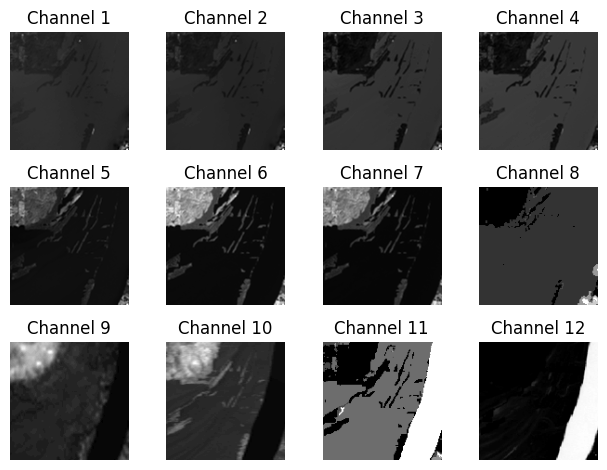

In [18]:
random.seed(40)
index=random.choice(range(len(images)))
img=images[index]
for i in range(0,12):
  plt.subplot(3,4,i+1)
  plt.imshow(img[:,:,i],cmap='gray')
  plt.axis('off')
  plt.title(f'Channel {i+1}')

plt.tight_layout()
plt.show()


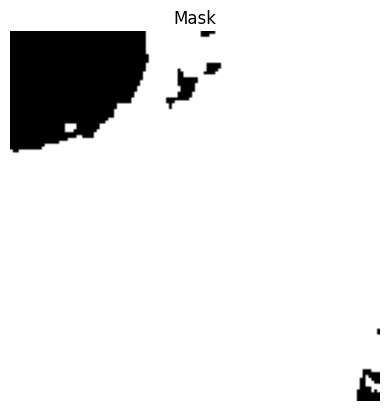

In [19]:
plt.imshow(masks[index],cmap='gray')
plt.title('Mask')
plt.axis('off')
plt.show()

# **Scaling**

In [20]:
for i in range(len(images)):
  print("image ",i)
  for ch in range(images[i].shape[2]):
    print(f"channel {ch} before : min {images[i][:,:,ch].min()}  max {images[i][:,:,ch].max()}")
    images[i][:,:,ch]=(images[i][:,:,ch]-images[i][:,:,ch].min())/(images[i][:,:,ch].max()-images[i][:,:,ch].min()+ 1e-8)
    print(f"channel {ch} after : min {images[i][:,:,ch].min()}  max {images[i][:,:,ch].max()}")



image  0
channel 0 before : min 14.0  max 532.0
channel 0 after : min 0.0  max 1.0
channel 1 before : min -28.0  max 846.0
channel 1 after : min 0.0  max 1.0
channel 2 before : min -2.0  max 1099.0
channel 2 after : min 0.0  max 1.0
channel 3 before : min 2.0  max 1297.0
channel 3 after : min 0.0  max 1.0
channel 4 before : min 46.0  max 4975.0
channel 4 after : min 0.0  max 1.0
channel 5 before : min 30.0  max 3786.0
channel 5 after : min 0.0  max 1.0
channel 6 before : min 16.0  max 3004.0
channel 6 after : min 0.0  max 1.0
channel 7 before : min 64.0  max 160.0
channel 7 after : min 0.0  max 1.0
channel 8 before : min 130.0  max 355.0
channel 8 after : min 0.0  max 1.0
channel 9 before : min 172.0  max 404.0
channel 9 after : min 0.0  max 1.0
channel 10 before : min 10.0  max 90.0
channel 10 after : min 0.0  max 1.0
channel 11 before : min 0.0  max 97.0
channel 11 after : min 0.0  max 1.0
image  1
channel 0 before : min 104.0  max 572.0
channel 0 after : min 0.0  max 1.0
channel 1 b

# **Spliting**

In [21]:
x_train, x_val, y_train, y_val=train_test_split(images,masks,test_size=0.25,random_state=42)

In [22]:
#x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.3,random_state=42)

In [23]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((229, 128, 128, 12), (77, 128, 128, 12), (229, 128, 128), (77, 128, 128))

In [24]:
# If y_train and y_val are numpy arrays with shape (N, 128, 128)
y_train = np.expand_dims(y_train, axis=-1)  # shape becomes (N, 128, 128, 1)
y_val = np.expand_dims(y_val, axis=-1)

# **Model**

In [25]:
from segmentation_models import Unet
from tensorflow.keras import layers, regularizers
import tensorflow as tf
import segmentation_models as sm

BACKBONE = "resnet101"
preprocess_input = sm.get_preprocessing(BACKBONE)

# Input layer for 12 channels
inputs = tf.keras.layers.Input(shape=(128, 128, 12), name="input_12ch")

# Adapter layers to reduce from 12 → 3 with regularization and dropout
x = layers.Conv2D(
    64, 3, padding="same", activation="relu"
    #,kernel_regularizer=regularizers.l2(1e-4)
)(inputs)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(
    32, 3, padding="same", activation="relu"
    #,kernel_regularizer=regularizers.l2(1e-4)
)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(
    3, 1, padding="same", activation="linear", name="channel_adapter"
    #,kernel_regularizer=regularizers.l2(1e-4)
)(x)

# sm expects 3-channel input, pass the reduced version to Unet
base_model = Unet(
    backbone_name=BACKBONE,
    input_shape=(128, 128, 3),
    classes=1,
    activation='sigmoid',
    encoder_weights='imagenet'  # or None
)

# Apply the model
output = base_model(x)

# Final model: from 12-channel input to output
model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()


I0000 00:00:1753363548.339638      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753363548.340368      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


171164896/171164896 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_12ch (InputLayer)         │ (None, 128, 128, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_adapter (Conv2D)        │ (None, 128, 128, 3)    │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 128, 128, 1)    │    51,605,466 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,631,005 (196.96 MB)

 Trainable params: 51,531,223 (196.58 MB)

 Non-trainable params: 99,782 (389.77 KB)

In [26]:
base_model.trainable=False

In [27]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='binary_crossentropy',
              metrics=[sm.metrics.iou_score,
        sm.metrics.f1_score,'accuracy'])

In [29]:
y_train.shape

(229, 128, 128, 1)

In [30]:
x_train_1 = preprocess_input(x_train)
x_val_1 = preprocess_input(x_val)

In [31]:
epochs=100
history = model.fit(
    x_train_1,
    y_train,
    epochs=epochs,
    validation_data=(x_val_1,y_val)
)

Epoch 1/100


I0000 00:00:1753363582.746580     109 service.cc:148] XLA service 0x7856b408ef70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753363582.747224     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753363582.747250     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753363586.282839     109 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1753363609.701427     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.3657 - f1-score: 0.3397 - iou_score: 0.2048 - loss: 0.8425 - val_accuracy: 0.6592 - val_f1-score: 0.3701 - val_iou_score: 0.2273 - val_loss: 0.6836
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.3910 - f1-score: 0.3454 - iou_score: 0.2093 - loss: 0.7691 - val_accuracy: 0.6355 - val_f1-score: 0.3718 - val_iou_score: 0.2285 - val_loss: 0.6884
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.4434 - f1-score: 0.3342 - iou_score: 0.2023 - loss: 0.7296 - val_accuracy: 0.5260 - val_f1-score: 0.3735 - val_iou_score: 0.2299 - val_loss: 0.6934
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.5127 - f1-score: 0.3407 - iou_score: 0.2060 - loss: 0.6998 - val_accuracy: 0.3512 - val_f1-score: 0.3761 - val_iou_score: 0.2318 - val_loss: 0.7018
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.5858 - f1-score: 0.3400 - iou_score: 0.2053 - loss: 0.6726 - val_accuracy: 0.3031 - val_f1-score:

In [32]:
plt.style.use("dark_background")

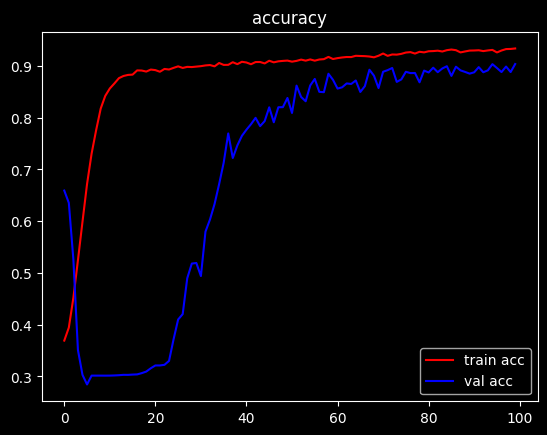

In [33]:
plt.plot(range(0,epochs),history.history['accuracy'],label='train acc',color='r')
plt.plot(range(0,epochs),history.history['val_accuracy'],label='val acc',color='b')
plt.legend()
plt.title('accuracy')
plt.show()

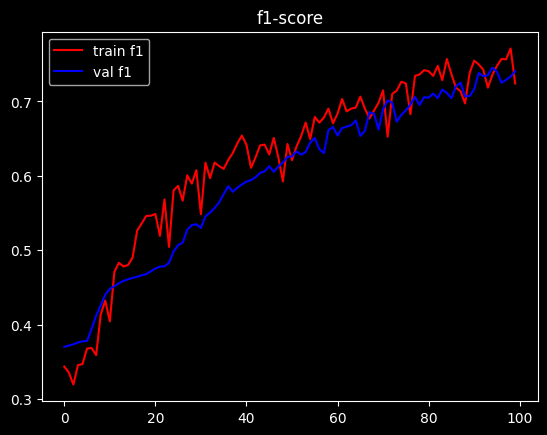

In [34]:
plt.plot(range(0,epochs),history.history['f1-score'],label='train f1',color='r')
plt.plot(range(0,epochs),history.history['val_f1-score'],label='val f1',color='b')
plt.legend()
plt.title('f1-score')
plt.show()

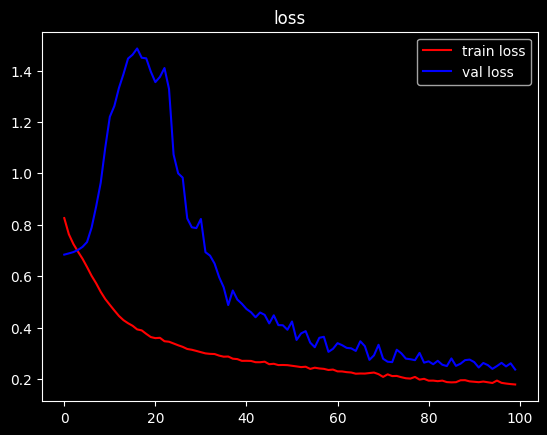

In [35]:
plt.plot(range(0,epochs),history.history['loss'],label='train loss',color='r')
plt.plot(range(0,epochs),history.history['val_loss'],label='val loss',color='b')
plt.legend()
plt.title('loss')
plt.show()

# Pytorch

In [36]:
! pip install segmentation-models-pytorch torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 12.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [37]:
import torch
import torch.nn as nn
import segmentation_models_pytorch as smp
import os
import imageio.v3 as iio
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchmetrics.classification import BinaryF1Score, BinaryJaccardIndex,BinaryAccuracy
from tqdm import tqdm
import random

In [38]:
images_url="/kaggle/input/satalite/satalite data/data/images"
labels_url="/kaggle/input/satalite/satalite data/data/labels"

In [39]:
images_dir=sorted(os.listdir(images_url),key=lambda x :int(x.split(".")[0]))
print(images_dir[0:10])  
print(len(images_dir))

['0.tif', '1.tif', '2.tif', '3.tif', '4.tif', '5.tif', '6.tif', '7.tif', '8.tif', '9.tif']
306


In [40]:
mask_dir=sorted([x for x in os.listdir(labels_url) if x.find("_")==-1],key=lambda x :int(x.split(".")[0]))
print(mask_dir[0:10])
print(len(mask_dir))

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
306


In [41]:
x_train_dir,x_val_dir,y_train_dir,y_val_dir=train_test_split(np.array(images_dir),np.array(mask_dir),test_size=0.25,random_state=42)

In [42]:
x_val_dir,x_test_dir,y_val_dir,y_test_dir=train_test_split(x_val_dir,y_val_dir,test_size=0.3,random_state=42)

In [43]:
print(x_train_dir.shape,y_train_dir.shape,x_val_dir.shape,y_val_dir.shape,x_test_dir.shape,y_test_dir.shape)

(229,) (229,) (53,) (53,) (24,) (24,)


In [44]:
epochs=50

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [46]:
## Model
class PretrainedUnet(nn.Module):
    def __init__(self, num_classes=1, encoder_name="resnet34", encoder_weights="imagenet"):
        super().__init__()

        # Add 1x1 conv layer to reduce 12 channels → 3
        self.input_conv = nn.Conv2d(12, 3, kernel_size=1)

        # Use standard pretrained U-Net 
        self.model = smp.Unet(
            encoder_name=encoder_name,
            encoder_weights=encoder_weights,
            in_channels=3,  
            classes=num_classes
        )

    def forward(self, x):
        x = self.input_conv(x)  
        return self.model(x)


## Dataset

class SatelliteDataset(Dataset):  

    def __init__(self,image_dir,mask_dir,images,masks,transform=None):
        self.image_dir=image_dir
        self.mask_dir=mask_dir
        self.transform=transform
        self.images=images
        self.masks = masks


    def __len__(self):
        return len(self.images)

    

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.masks[index])
        
        image = np.array(iio.imread(img_path), dtype=np.float32)
        mask = np.array(Image.open(mask_path).convert('L'), dtype=np.float32)
    
        # Min-max scaling per channel
        for ch in range(image.shape[2]):
            image[:, :, ch] = (image[:, :, ch] - image[:, :, ch].min()) / (image[:, :, ch].max() - image[:, :, ch].min() + 1e-8)
            #print(f"image channel{ch} min={image[:,:,ch].min()}, max ={image[:,:,ch].max()}" )
    
        # Apply augmentations (including ToTensorV2)
        if self.transform is not None:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']  # Already a tensor if ToTensorV2 is used
            mask = augmented['mask']
        else:
            # If no transform, manually convert
            image = torch.from_numpy(image).permute(2, 0, 1).float()
            mask = torch.from_numpy(mask).unsqueeze(0).float()


        return image, mask



###########################################################
## Dataset and loader 

train_dataset = SatelliteDataset(images_url,labels_url,x_train_dir, y_train_dir)
val_dataset = SatelliteDataset(images_url,labels_url,x_val_dir, y_val_dir)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)


# Initialize model, loss, metrics

model = PretrainedUnet(num_classes=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

f1_metric = BinaryF1Score().to(device)
iou_metric = BinaryJaccardIndex().to(device)
accuracy_metric = BinaryAccuracy().to(device)

# Training / Validation Loop
def train_one_epoch():
    model.train()
    total_loss = 0.0
    total_f1 = 0.0
    total_iou = 0.0
    total_acc = 0.0

    for images, masks in tqdm(train_loader):
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.sigmoid(outputs)
        preds = (preds > 0.5).float()

        total_f1 += f1_metric(preds, masks).item()
        total_iou += iou_metric(preds, masks).item()
        total_acc += accuracy_metric(preds, masks).item()

    return (total_loss / len(train_loader),
            total_f1 / len(train_loader),
            total_iou / len(train_loader),
            total_acc / len(train_loader))
#######################################

def validate():
    model.eval()
    val_loss = 0.0
    total_f1 = 0.0
    total_iou = 0.0
    total_acc = 0.0

    with torch.no_grad():
        for images, masks in tqdm(val_loader):
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

            preds = torch.sigmoid(outputs)
            preds = (preds > 0.5).float()

            total_f1 += f1_metric(preds, masks).item()
            total_iou += iou_metric(preds, masks).item()
            total_acc += accuracy_metric(preds, masks).item()

    return (val_loss / len(val_loader),
            total_f1 / len(val_loader),
            total_iou / len(val_loader),
            total_acc / len(val_loader))



# Run Training
train_losses, val_losses = [], []
train_f1s, val_f1s = [], []
train_ious, val_ious = [], []
train_accuracies, val_accuracies = [], []



for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}")

    train_loss, train_f1, train_iou, train_acc = train_one_epoch()
    val_loss, val_f1, val_iou, val_acc = validate()

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_f1s.append(train_f1)
    val_f1s.append(val_f1)
    train_ious.append(train_iou)
    val_ious.append(val_iou)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, F1: {train_f1:.4f}, IoU: {train_iou:.4f}, Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, F1: {val_f1:.4f}, IoU: {val_iou:.4f}, Acc: {val_acc:.4f}")


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]


Epoch 1


100%|██████████| 7/7 [00:00<00:00, 14.99it/s]


Train Loss: 0.5681, F1: 0.5824, IoU: 0.4271, Acc: 0.7459
Val Loss: 0.5207, F1: 0.6394, IoU: 0.4752, Acc: 0.8235

Epoch 2


100%|██████████| 7/7 [00:00<00:00, 13.06it/s]


Train Loss: 0.3630, F1: 0.6360, IoU: 0.4795, Acc: 0.8507
Val Loss: 0.7545, F1: 0.6945, IoU: 0.5409, Acc: 0.8048

Epoch 3


100%|██████████| 7/7 [00:00<00:00, 13.74it/s]


Train Loss: 0.3323, F1: 0.6771, IoU: 0.5264, Acc: 0.8597
Val Loss: 0.3783, F1: 0.6281, IoU: 0.4652, Acc: 0.8227

Epoch 4


100%|██████████| 7/7 [00:00<00:00, 10.91it/s]


Train Loss: 0.3074, F1: 0.6605, IoU: 0.5024, Acc: 0.8666
Val Loss: 0.2653, F1: 0.7682, IoU: 0.6291, Acc: 0.8836

Epoch 5


100%|██████████| 7/7 [00:00<00:00, 15.44it/s]


Train Loss: 0.3108, F1: 0.7187, IoU: 0.5739, Acc: 0.8761
Val Loss: 0.4412, F1: 0.6102, IoU: 0.4533, Acc: 0.8464

Epoch 6


100%|██████████| 7/7 [00:00<00:00, 15.36it/s]


Train Loss: 0.2926, F1: 0.7185, IoU: 0.5687, Acc: 0.8799
Val Loss: 0.5214, F1: 0.7477, IoU: 0.6069, Acc: 0.8430

Epoch 7


100%|██████████| 7/7 [00:00<00:00, 15.27it/s]


Train Loss: 0.2733, F1: 0.7403, IoU: 0.6081, Acc: 0.8895
Val Loss: 0.3016, F1: 0.7354, IoU: 0.5938, Acc: 0.8801

Epoch 8


100%|██████████| 7/7 [00:00<00:00, 13.12it/s]


Train Loss: 0.2589, F1: 0.7513, IoU: 0.6088, Acc: 0.8915
Val Loss: 0.3111, F1: 0.7298, IoU: 0.5846, Acc: 0.8666

Epoch 9


100%|██████████| 7/7 [00:00<00:00, 15.30it/s]


Train Loss: 0.2751, F1: 0.7318, IoU: 0.5890, Acc: 0.8827
Val Loss: 0.2965, F1: 0.7385, IoU: 0.5909, Acc: 0.8769

Epoch 10


100%|██████████| 7/7 [00:00<00:00, 15.50it/s]


Train Loss: 0.2670, F1: 0.7377, IoU: 0.5986, Acc: 0.8904
Val Loss: 0.2642, F1: 0.7913, IoU: 0.6614, Acc: 0.8974

Epoch 11


100%|██████████| 7/7 [00:00<00:00, 15.42it/s]


Train Loss: 0.2463, F1: 0.7681, IoU: 0.6334, Acc: 0.8991
Val Loss: 0.2470, F1: 0.7857, IoU: 0.6559, Acc: 0.8998

Epoch 12


100%|██████████| 7/7 [00:00<00:00,  9.55it/s]


Train Loss: 0.2483, F1: 0.7769, IoU: 0.6472, Acc: 0.9014
Val Loss: 0.3352, F1: 0.7232, IoU: 0.5756, Acc: 0.8802

Epoch 13


100%|██████████| 7/7 [00:00<00:00, 15.92it/s]


Train Loss: 0.2505, F1: 0.7765, IoU: 0.6443, Acc: 0.8997
Val Loss: 0.2500, F1: 0.7726, IoU: 0.6387, Acc: 0.8957

Epoch 14


100%|██████████| 7/7 [00:00<00:00, 16.23it/s]


Train Loss: 0.2276, F1: 0.7926, IoU: 0.6633, Acc: 0.9059
Val Loss: 0.2388, F1: 0.8023, IoU: 0.6763, Acc: 0.8951

Epoch 15


100%|██████████| 7/7 [00:00<00:00, 15.68it/s]


Train Loss: 0.2141, F1: 0.7926, IoU: 0.6639, Acc: 0.9099
Val Loss: 0.2362, F1: 0.7987, IoU: 0.6706, Acc: 0.8994

Epoch 16


100%|██████████| 7/7 [00:00<00:00, 15.51it/s]


Train Loss: 0.2018, F1: 0.8086, IoU: 0.6890, Acc: 0.9182
Val Loss: 0.2384, F1: 0.7983, IoU: 0.6718, Acc: 0.9004

Epoch 17


100%|██████████| 7/7 [00:00<00:00, 13.33it/s]


Train Loss: 0.2191, F1: 0.7731, IoU: 0.6474, Acc: 0.9045
Val Loss: 0.2186, F1: 0.8081, IoU: 0.6857, Acc: 0.9085

Epoch 18


100%|██████████| 7/7 [00:00<00:00, 14.97it/s]


Train Loss: 0.2070, F1: 0.8018, IoU: 0.6841, Acc: 0.9144
Val Loss: 0.2413, F1: 0.8161, IoU: 0.6947, Acc: 0.9075

Epoch 19


100%|██████████| 7/7 [00:00<00:00, 16.06it/s]


Train Loss: 0.1973, F1: 0.8228, IoU: 0.7036, Acc: 0.9200
Val Loss: 0.2359, F1: 0.8077, IoU: 0.6864, Acc: 0.9094

Epoch 20


100%|██████████| 7/7 [00:00<00:00, 14.95it/s]


Train Loss: 0.1913, F1: 0.8160, IoU: 0.7003, Acc: 0.9202
Val Loss: 0.2152, F1: 0.8292, IoU: 0.7143, Acc: 0.9102

Epoch 21


100%|██████████| 7/7 [00:00<00:00, 15.73it/s]


Train Loss: 0.1860, F1: 0.8270, IoU: 0.7144, Acc: 0.9225
Val Loss: 0.2129, F1: 0.8299, IoU: 0.7147, Acc: 0.9150

Epoch 22


100%|██████████| 7/7 [00:00<00:00, 10.42it/s]


Train Loss: 0.1620, F1: 0.8508, IoU: 0.7450, Acc: 0.9338
Val Loss: 0.2712, F1: 0.7831, IoU: 0.6531, Acc: 0.9007

Epoch 23


100%|██████████| 7/7 [00:00<00:00, 15.53it/s]


Train Loss: 0.1620, F1: 0.8447, IoU: 0.7443, Acc: 0.9332
Val Loss: 0.2304, F1: 0.8270, IoU: 0.7082, Acc: 0.8959

Epoch 24


100%|██████████| 7/7 [00:00<00:00, 16.19it/s]


Train Loss: 0.1637, F1: 0.8516, IoU: 0.7464, Acc: 0.9333
Val Loss: 0.2185, F1: 0.8368, IoU: 0.7235, Acc: 0.9125

Epoch 25


100%|██████████| 7/7 [00:00<00:00, 14.36it/s]


Train Loss: 0.1694, F1: 0.8457, IoU: 0.7380, Acc: 0.9307
Val Loss: 0.2029, F1: 0.8388, IoU: 0.7295, Acc: 0.9160

Epoch 26


100%|██████████| 7/7 [00:00<00:00, 13.16it/s]


Train Loss: 0.1492, F1: 0.8566, IoU: 0.7623, Acc: 0.9401
Val Loss: 0.1925, F1: 0.8581, IoU: 0.7543, Acc: 0.9249

Epoch 27


100%|██████████| 7/7 [00:00<00:00, 15.43it/s]


Train Loss: 0.1334, F1: 0.8762, IoU: 0.7847, Acc: 0.9456
Val Loss: 0.1858, F1: 0.8532, IoU: 0.7484, Acc: 0.9252

Epoch 28


100%|██████████| 7/7 [00:00<00:00, 13.11it/s]


Train Loss: 0.1285, F1: 0.8819, IoU: 0.7933, Acc: 0.9468
Val Loss: 0.1972, F1: 0.8531, IoU: 0.7500, Acc: 0.9248

Epoch 29


100%|██████████| 7/7 [00:00<00:00, 15.03it/s]


Train Loss: 0.1266, F1: 0.8773, IoU: 0.7876, Acc: 0.9494
Val Loss: 0.1826, F1: 0.8646, IoU: 0.7661, Acc: 0.9286

Epoch 30


100%|██████████| 7/7 [00:00<00:00, 12.91it/s]


Train Loss: 0.1186, F1: 0.8774, IoU: 0.7931, Acc: 0.9513
Val Loss: 0.1698, F1: 0.8739, IoU: 0.7795, Acc: 0.9300

Epoch 31


100%|██████████| 7/7 [00:00<00:00, 15.35it/s]


Train Loss: 0.1143, F1: 0.8882, IoU: 0.8048, Acc: 0.9538
Val Loss: 0.1889, F1: 0.8565, IoU: 0.7547, Acc: 0.9246

Epoch 32


100%|██████████| 7/7 [00:00<00:00, 15.34it/s]


Train Loss: 0.1028, F1: 0.9090, IoU: 0.8359, Acc: 0.9589
Val Loss: 0.1813, F1: 0.8627, IoU: 0.7655, Acc: 0.9279

Epoch 33


100%|██████████| 7/7 [00:00<00:00, 16.33it/s]


Train Loss: 0.0972, F1: 0.9108, IoU: 0.8381, Acc: 0.9602
Val Loss: 0.1727, F1: 0.8786, IoU: 0.7876, Acc: 0.9351

Epoch 34


100%|██████████| 7/7 [00:00<00:00, 14.90it/s]


Train Loss: 0.1033, F1: 0.9052, IoU: 0.8300, Acc: 0.9581
Val Loss: 0.1996, F1: 0.8625, IoU: 0.7638, Acc: 0.9271

Epoch 35


100%|██████████| 7/7 [00:00<00:00, 14.97it/s]


Train Loss: 0.1019, F1: 0.9111, IoU: 0.8385, Acc: 0.9583
Val Loss: 0.2009, F1: 0.8641, IoU: 0.7650, Acc: 0.9288

Epoch 36


100%|██████████| 7/7 [00:00<00:00, 15.79it/s]


Train Loss: 0.0998, F1: 0.9046, IoU: 0.8289, Acc: 0.9588
Val Loss: 0.1691, F1: 0.8778, IoU: 0.7866, Acc: 0.9354

Epoch 37


100%|██████████| 7/7 [00:00<00:00, 15.78it/s]


Train Loss: 0.1064, F1: 0.8852, IoU: 0.8060, Acc: 0.9575
Val Loss: 0.2003, F1: 0.8570, IoU: 0.7551, Acc: 0.9251

Epoch 38


100%|██████████| 7/7 [00:00<00:00, 14.47it/s]


Train Loss: 0.1082, F1: 0.9022, IoU: 0.8239, Acc: 0.9563
Val Loss: 0.1797, F1: 0.8708, IoU: 0.7742, Acc: 0.9245

Epoch 39


100%|██████████| 7/7 [00:00<00:00, 14.96it/s]


Train Loss: 0.1186, F1: 0.8757, IoU: 0.7868, Acc: 0.9525
Val Loss: 0.2251, F1: 0.8409, IoU: 0.7338, Acc: 0.9214

Epoch 40


100%|██████████| 7/7 [00:00<00:00, 15.32it/s]


Train Loss: 0.1005, F1: 0.9100, IoU: 0.8369, Acc: 0.9594
Val Loss: 0.1592, F1: 0.8846, IoU: 0.7965, Acc: 0.9367

Epoch 41


100%|██████████| 7/7 [00:00<00:00, 15.86it/s]


Train Loss: 0.0919, F1: 0.9112, IoU: 0.8409, Acc: 0.9627
Val Loss: 0.1650, F1: 0.8735, IoU: 0.7818, Acc: 0.9352

Epoch 42


100%|██████████| 7/7 [00:00<00:00, 15.67it/s]


Train Loss: 0.0826, F1: 0.9252, IoU: 0.8632, Acc: 0.9664
Val Loss: 0.1676, F1: 0.8851, IoU: 0.8003, Acc: 0.9396

Epoch 43


100%|██████████| 7/7 [00:00<00:00, 13.85it/s]


Train Loss: 0.0772, F1: 0.9302, IoU: 0.8709, Acc: 0.9687
Val Loss: 0.1611, F1: 0.8874, IoU: 0.8022, Acc: 0.9408

Epoch 44


100%|██████████| 7/7 [00:00<00:00, 15.73it/s]


Train Loss: 0.0740, F1: 0.9196, IoU: 0.8574, Acc: 0.9703
Val Loss: 0.1706, F1: 0.8859, IoU: 0.8004, Acc: 0.9394

Epoch 45


100%|██████████| 7/7 [00:00<00:00, 14.80it/s]


Train Loss: 0.0803, F1: 0.9159, IoU: 0.8496, Acc: 0.9686
Val Loss: 0.1632, F1: 0.8845, IoU: 0.7970, Acc: 0.9378

Epoch 46


100%|██████████| 7/7 [00:00<00:00, 15.80it/s]


Train Loss: 0.0826, F1: 0.9199, IoU: 0.8552, Acc: 0.9670
Val Loss: 0.2011, F1: 0.8702, IoU: 0.7766, Acc: 0.9336

Epoch 47


100%|██████████| 7/7 [00:00<00:00, 15.69it/s]


Train Loss: 0.0705, F1: 0.9336, IoU: 0.8768, Acc: 0.9714
Val Loss: 0.1704, F1: 0.8860, IoU: 0.7997, Acc: 0.9393

Epoch 48


100%|██████████| 7/7 [00:00<00:00, 15.50it/s]


Train Loss: 0.0694, F1: 0.9311, IoU: 0.8739, Acc: 0.9725
Val Loss: 0.1617, F1: 0.8920, IoU: 0.8091, Acc: 0.9415

Epoch 49


100%|██████████| 7/7 [00:00<00:00, 14.57it/s]


Train Loss: 0.0751, F1: 0.9342, IoU: 0.8777, Acc: 0.9703
Val Loss: 0.1996, F1: 0.8642, IoU: 0.7661, Acc: 0.9314

Epoch 50


100%|██████████| 7/7 [00:00<00:00, 14.99it/s]

Train Loss: 0.0692, F1: 0.9374, IoU: 0.8832, Acc: 0.9719
Val Loss: 0.1527, F1: 0.8970, IoU: 0.8168, Acc: 0.9446


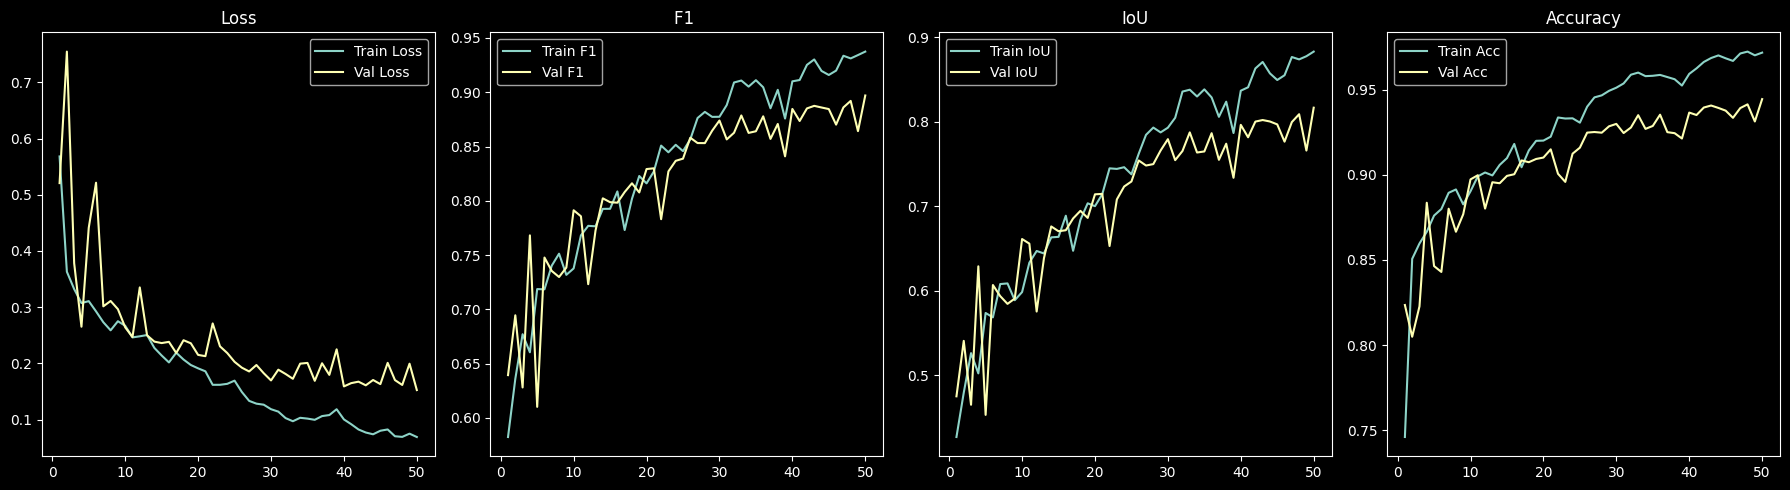

In [47]:
import matplotlib.pyplot as plt

def plot_metrics():
    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(18, 5))

    # Loss
    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, val_losses, label='Val Loss')
    plt.title('Loss')
    plt.legend()

    # F1 
    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_f1s, label='Train F1')
    plt.plot(epochs_range, val_f1s, label='Val F1')
    plt.title('F1 ')
    plt.legend()
   

    #  IoU
    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_ious, label='Train IoU')
    plt.plot(epochs_range, val_ious, label='Val IoU')
    plt.title('IoU')
    plt.legend()

  
    
    # Accuracy
    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_accuracies, label='Train Acc')
    plt.plot(epochs_range, val_accuracies, label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call after training
plot_metrics()

# Evaluate

In [48]:
test_dataset = SatelliteDataset(images_url,labels_url,x_test_dir, y_test_dir)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

In [49]:
from torchmetrics.classification import BinaryF1Score, BinaryJaccardIndex, BinaryAccuracy

# Initialize metrics
f1_metric = BinaryF1Score().to(device)
iou_metric = BinaryJaccardIndex().to(device)
acc_metric = BinaryAccuracy().to(device)

f1_metric.reset()
iou_metric.reset()
acc_metric.reset()

pred_masks = []
true_masks = []

model.eval()
with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        masks = masks.to(device)

        preds = torch.sigmoid(model(images)) > 0.5

        pred_masks.append(preds.detach().cpu())
        true_masks.append(masks.detach().cpu())

        f1_metric.update(preds, masks)
        iou_metric.update(preds, masks)
        acc_metric.update(preds, masks)

# Print final scores
print("F1 Score:", f1_metric.compute().item())
print("IoU Score:", iou_metric.compute().item())
print("Accuracy:", acc_metric.compute().item())

F1 Score: 0.9231144189834595
IoU Score: 0.8572075366973877
Accuracy: 0.9502614140510559


In [50]:
flattened_true_masks = torch.cat(true_masks, dim=0) 
flattened_pred_masks = torch.cat(pred_masks, dim=0) 

In [51]:
flattened_true_masks[0].shape

torch.Size([1, 128, 128])

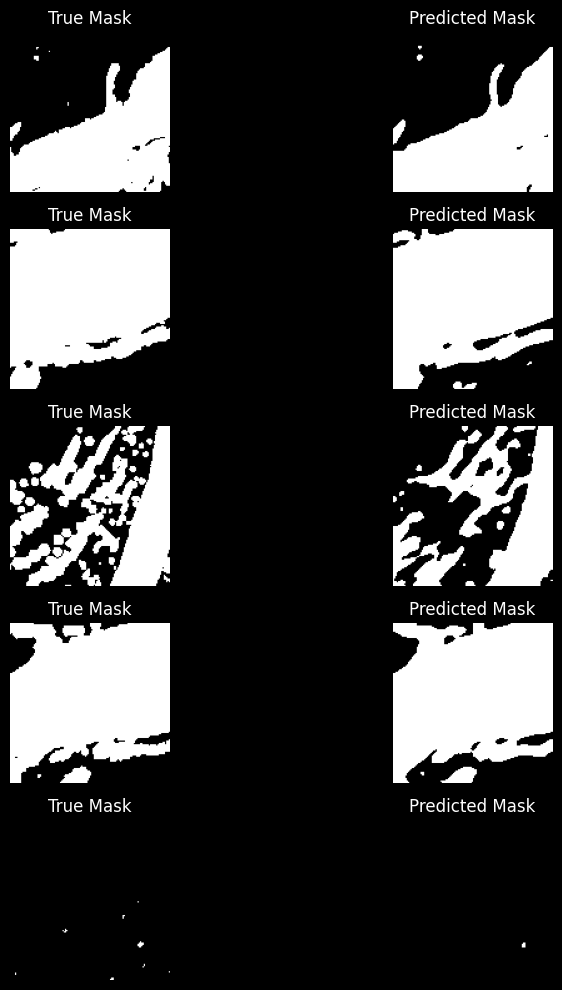

In [52]:
import matplotlib.pyplot as plt
import random

# Plot 5 random pairs
plt.figure(figsize=(10, 10))
for i in range(5):
    idx = random.randint(0, len(flattened_true_masks) - 1)
    
    true_mask = flattened_true_masks[idx].squeeze().cpu().numpy()
    pred_mask = flattened_pred_masks[idx].squeeze().cpu().numpy()
    
    # True mask
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(true_mask, cmap='gray')
    plt.title('True Mask')
    plt.axis('off')

    # Predicted mask
    plt.subplot(5, 2, i * 2 + 2)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()
